Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 116us/sample - loss: 1.1224 - accuracy: 0.6989 - val_loss: 0.7371 - val_accuracy: 0.7742
Epoch 2/10
55000/55000 [==============================] - 4s 81us/sample - loss: 0.6663 - accuracy: 0.7821 - val_loss: 0.5976 - val_accuracy: 0.8036
Epoch 3/10
55000/55000 [==============================] - 4s 77us/sample - loss: 0.5864 - accuracy: 0.8016 - val_loss: 0.5635 - val_accuracy: 0.8100
Epoch 4/10
55000/55000 [==============================] - 4s 78us/sample - loss: 0.5628 - accuracy: 0.8091 - val_loss: 0.5449 - val_accuracy: 0.8140
Epoch 5/10
55000/55000 [==============================] - 4s 77us/sample - loss: 0.5451 - accuracy: 0.8127 - val_loss: 0.5321 - val_accuracy: 0.8134
Epoch 6/10
55000/55000 [==============================] - 4s 80us/sample - loss: 0.5399 - accuracy: 0.8140 - val_loss: 0.5360 - val_accuracy: 0.8192
Epoch 7/10
55000/55000 [==============================] 

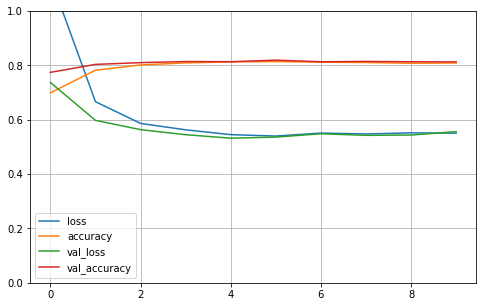

In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys


def plot_learning_curves(history):

    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()


fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='sigmoid'))
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#另外一种网络模型搭建的写法
# model = tf.keras.models.Sequential([
# #     tf.keras.layers.Dense(300,activation='sigmoid'),
# #     tf.keras.layers.Dense(100,activation='sigmoid'),
# #     tf.keras.layers.Dense(10,activation='softmax')
# # ])


model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

plot_learning_curves(history)